# Loading all libraries

In [91]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm as SVM_MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
    roc_curve
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Loading the dataset 1

In [92]:
df = pd.read_csv("lungcancer.csv")

# Preprocessing

# Checking for null values

In [93]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            1
CHRONIC DISEASE          1
FATIGUE                  0
ALLERGY                  1
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Removing null values

In [94]:
df["PEER_PRESSURE"] = df["PEER_PRESSURE"].fillna(df["PEER_PRESSURE"].mode()[0])
df['CHRONIC DISEASE'] = df['CHRONIC DISEASE'].fillna(df['CHRONIC DISEASE'].mean())
df['ALCOHOL CONSUMING'] = df['ALCOHOL CONSUMING'].fillna(df['ALCOHOL CONSUMING'].median())
df['ALLERGY'] = df['ALLERGY'].fillna(df['ALLERGY'].median())
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

# Checking for duplicate values

In [95]:
df.duplicated().sum()

33

# Removing duplicate values

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 311
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 279 non-null    object 
 1   AGE                    279 non-null    int64  
 2   SMOKING                279 non-null    int64  
 3   YELLOW_FINGERS         279 non-null    int64  
 4   ANXIETY                279 non-null    int64  
 5   PEER_PRESSURE          279 non-null    float64
 6   CHRONIC DISEASE        279 non-null    float64
 7   FATIGUE                279 non-null    int64  
 8   ALLERGY                279 non-null    float64
 9   WHEEZING               279 non-null    int64  
 10  ALCOHOL CONSUMING      279 non-null    int64  
 11  COUGHING               279 non-null    int64  
 12  SHORTNESS OF BREATH    279 non-null    int64  
 13  SWALLOWING DIFFICULTY  279 non-null    int64  
 14  CHEST PAIN             279 non-null    int64  
 15  LUNG_CANCER

# Encoding values in GENDER AND LUNG_CANCER columns

In [98]:
label_encoder = LabelEncoder()
df = pd.get_dummies(df, columns=['GENDER'])
df["GENDER_F"] = label_encoder.fit_transform(df["GENDER_F"])
df["GENDER_M"] = label_encoder.fit_transform(df["GENDER_M"])
df["F"] = df["GENDER_F"]
df["M"] = df["GENDER_M"]
df.drop(columns=["GENDER_F", "GENDER_M"], inplace=True)
df["LUNG_CANCER"] = label_encoder.fit_transform(df["LUNG_CANCER"])

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 311
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    279 non-null    int64  
 1   SMOKING                279 non-null    int64  
 2   YELLOW_FINGERS         279 non-null    int64  
 3   ANXIETY                279 non-null    int64  
 4   PEER_PRESSURE          279 non-null    float64
 5   CHRONIC DISEASE        279 non-null    float64
 6   FATIGUE                279 non-null    int64  
 7   ALLERGY                279 non-null    float64
 8   WHEEZING               279 non-null    int64  
 9   ALCOHOL CONSUMING      279 non-null    int64  
 10  COUGHING               279 non-null    int64  
 11  SHORTNESS OF BREATH    279 non-null    int64  
 12  SWALLOWING DIFFICULTY  279 non-null    int64  
 13  CHEST PAIN             279 non-null    int64  
 14  LUNG_CANCER            279 non-null    int32  
 15  F          

# Changing column positions

In [100]:
df = df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
         'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'M',
         'F', 'LUNG_CANCER']]
df.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,M,F,LUNG_CANCER
0,69,1,2,2,1.0,1.0,2,1.0,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1.0,2.0,2,2.0,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2.0,1.0,2,1.0,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1.0,1.0,1,1.0,1,2,1,1,2,2,1,0,0
4,63,1,2,1,1.0,1.0,1,1.0,2,1,2,2,1,1,0,1,0


# Logistic Regression

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)

logistic_regression = LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)
log_acc = accuracy_score(y_test, logistic_regression_pred)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, logistic_regression_pred))
print("Logistic Regression Classification Report: \n",
      classification_report(y_test, logistic_regression_pred, zero_division='warn'))

Logistic Regression Accuracy:  0.9642857142857143
Logistic Regression Confusion Matrix: 
 [[ 6  2]
 [ 0 48]]
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.96      1.00      0.98        48

    accuracy                           0.96        56
   macro avg       0.98      0.88      0.92        56
weighted avg       0.97      0.96      0.96        56


# SVM

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
svm = SVM_MODEL.SVC(max_iter=15000)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("SVM Confusion Matrix: \n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report: \n", classification_report(y_test, svm_pred, zero_division='warn'))


SVM Accuracy:  0.8571428571428571
SVM Confusion Matrix: 
 [[ 0  8]
 [ 0 48]]
SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.86      1.00      0.92        48

    accuracy                           0.86        56
   macro avg       0.43      0.50      0.46        56
weighted avg       0.73      0.86      0.79        56


C:\Users\Rohithk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rohithk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rohithk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [103]:

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,
                                                    random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix: \n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report: \n", classification_report(y_test, knn_pred, zero_division='warn'))


KNN Accuracy:  0.875
KNN Confusion Matrix: 
 [[ 1  7]
 [ 0 48]]
KNN Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.87      1.00      0.93        48

    accuracy                           0.88        56
   macro avg       0.94      0.56      0.58        56
weighted avg       0.89      0.88      0.83        56


# Decision Tree

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:len(df.columns) - 1], df["LUNG_CANCER"], test_size=0.2,random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
dt_acc = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_test, decision_tree_pred))
print("Decision Tree Classification Report: \n",
      classification_report(y_test, decision_tree_pred, zero_division='warn'))


Decision Tree Accuracy:  0.9107142857142857
Decision Tree Confusion Matrix: 
 [[ 5  3]
 [ 2 46]]
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.94      0.96      0.95        48

    accuracy                           0.91        56
   macro avg       0.83      0.79      0.81        56
weighted avg       0.91      0.91      0.91        56


# Using Stratified K-Fold splitting - Logistic Regression

In [105]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_log_acc = 0
for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        logistic_regression = LogisticRegression(max_iter=5000)
        logistic_regression.fit(X_train, y_train)
        logistic_regression_pred = logistic_regression.predict(X_test)
        log_acc = accuracy_score(y_test, logistic_regression_pred)
        max_log_acc = max(max_log_acc, log_acc)
        print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Max Logistic Regression Accuracy: ", max_log_acc)

Logistic Regression Accuracy:  0.9107142857142857
Logistic Regression Accuracy:  0.9285714285714286
Logistic Regression Accuracy:  0.9285714285714286
Logistic Regression Accuracy:  0.8214285714285714
Logistic Regression Accuracy:  0.8727272727272727
Max Logistic Regression Accuracy:  0.9285714285714286


# Using K-Fold splitting - Logistic Regression

In [106]:
kfsplit = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_log_acc = 0
for train_index, test_index in kfsplit.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        logistic_regression = LogisticRegression(max_iter=5000)
        logistic_regression.fit(X_train, y_train)
        logistic_regression_pred = logistic_regression.predict(X_test)
        log_acc = accuracy_score(y_test, logistic_regression_pred)
        max_log_acc = max(max_log_acc, log_acc)
        print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_regression_pred))
print("Max Logistic Regression Accuracy: ", max_log_acc)

Logistic Regression Accuracy:  0.9642857142857143
Logistic Regression Accuracy:  0.8571428571428571
Logistic Regression Accuracy:  0.9107142857142857
Logistic Regression Accuracy:  0.8392857142857143
Logistic Regression Accuracy:  0.9090909090909091
Max Logistic Regression Accuracy:  0.9642857142857143


# Using Stratified K-Fold splitting - SVM

In [107]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_svm_acc = 0
for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        svm_model = SVM_MODEL.SVC(max_iter=1000)
        svm_model.fit(X_train, y_train)
        svm_pred = svm_model.predict(X_test)
        svm_acc = accuracy_score(y_test, svm_pred)
        max_svm_acc = max(max_svm_acc, svm_acc)
        print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("Max SVM Accuracy: ", max_svm_acc)

SVM Accuracy:  0.8571428571428571
SVM Accuracy:  0.8571428571428571
SVM Accuracy:  0.8571428571428571
SVM Accuracy:  0.8571428571428571
SVM Accuracy:  0.8545454545454545
Max SVM Accuracy:  0.8571428571428571


# Using K-Fold splitting - SVM

In [108]:
kfsplit = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_svm_acc = 0
for train_index, test_index in kfsplit.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        svm_model = SVM_MODEL.SVC(max_iter=1000)
        svm_model.fit(X_train, y_train)
        svm_pred = svm_model.predict(X_test)
        svm_acc = accuracy_score(y_test, svm_pred)
        max_svm_acc = max(max_svm_acc, svm_acc)
        print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print("Max SVM Accuracy: ", max_svm_acc)

SVM Accuracy:  0.8571428571428571
SVM Accuracy:  0.8571428571428571
SVM Accuracy:  0.8392857142857143
SVM Accuracy:  0.8571428571428571
SVM Accuracy:  0.8727272727272727
Max SVM Accuracy:  0.8727272727272727


# Using Stratified K-Fold splitting - KNN

In [109]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_knn_acc = 0
for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_acc = accuracy_score(y_test, knn_pred)
        max_knn_acc = max(max_knn_acc, knn_acc)
        print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("Max KNN Accuracy: ", max_knn_acc)

KNN Accuracy:  0.8214285714285714
KNN Accuracy:  0.8214285714285714
KNN Accuracy:  0.8571428571428571
KNN Accuracy:  0.8214285714285714
KNN Accuracy:  0.8545454545454545
Max KNN Accuracy:  0.8571428571428571


# Using K-Fold splitting - KNN

In [110]:
kfsplit = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_knn_acc = 0
for train_index, test_index in kfsplit.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        knn_pred = knn.predict(X_test)
        knn_acc = accuracy_score(y_test, knn_pred)
        max_knn_acc = max(max_knn_acc, knn_acc)
        print("KNN Accuracy: ", accuracy_score(y_test, knn_pred))
print("Max KNN Accuracy: ", max_knn_acc)

KNN Accuracy:  0.8928571428571429
KNN Accuracy:  0.8392857142857143
KNN Accuracy:  0.8392857142857143
KNN Accuracy:  0.8571428571428571
KNN Accuracy:  0.8545454545454545
Max KNN Accuracy:  0.8928571428571429


# Using Stratified K-Fold splitting - Decision Tree

In [111]:
stratified_split = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_dt_acc = 0
for train_index, test_index in stratified_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(X_train, y_train)
        decision_tree_pred = decision_tree.predict(X_test)
        dt_acc = accuracy_score(y_test, decision_tree_pred)
        max_dt_acc = max(max_dt_acc, dt_acc)
        print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Max Decision Tree Accuracy: ", max_dt_acc)

Decision Tree Accuracy:  0.8214285714285714
Decision Tree Accuracy:  0.8571428571428571
Decision Tree Accuracy:  0.8214285714285714
Decision Tree Accuracy:  0.8035714285714286
Decision Tree Accuracy:  0.8
Max Decision Tree Accuracy:  0.8571428571428571


# Using K-Fold splitting - Decision Tree

In [112]:
kfsplit = KFold(n_splits=5, shuffle=True, random_state=42)
X = df.iloc[:, 0:len(df.columns) - 1]
y = df.iloc[:, len(df.columns) - 1]
max_dt_acc = 0
for train_index, test_index in kfsplit.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        decision_tree = DecisionTreeClassifier()
        decision_tree.fit(X_train, y_train)
        decision_tree_pred = decision_tree.predict(X_test)
        dt_acc = accuracy_score(y_test, decision_tree_pred)
        max_dt_acc = max(max_dt_acc, dt_acc)
        print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print("Max Decision Tree Accuracy: ", max_dt_acc)

Decision Tree Accuracy:  0.9464285714285714
Decision Tree Accuracy:  0.875
Decision Tree Accuracy:  0.875
Decision Tree Accuracy:  0.8035714285714286
Decision Tree Accuracy:  0.9090909090909091
Max Decision Tree Accuracy:  0.9464285714285714


# Graphs


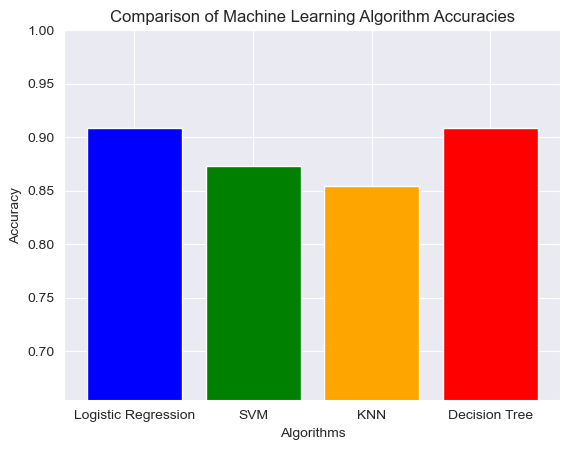

In [113]:

# Algorithms and their accuracies
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [log_acc, svm_acc, knn_acc, dt_acc]

# Create bar chart
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Algorithm Accuracies')
plt.ylim(min(accuracies) - 0.2, 1.0)
plt.show()


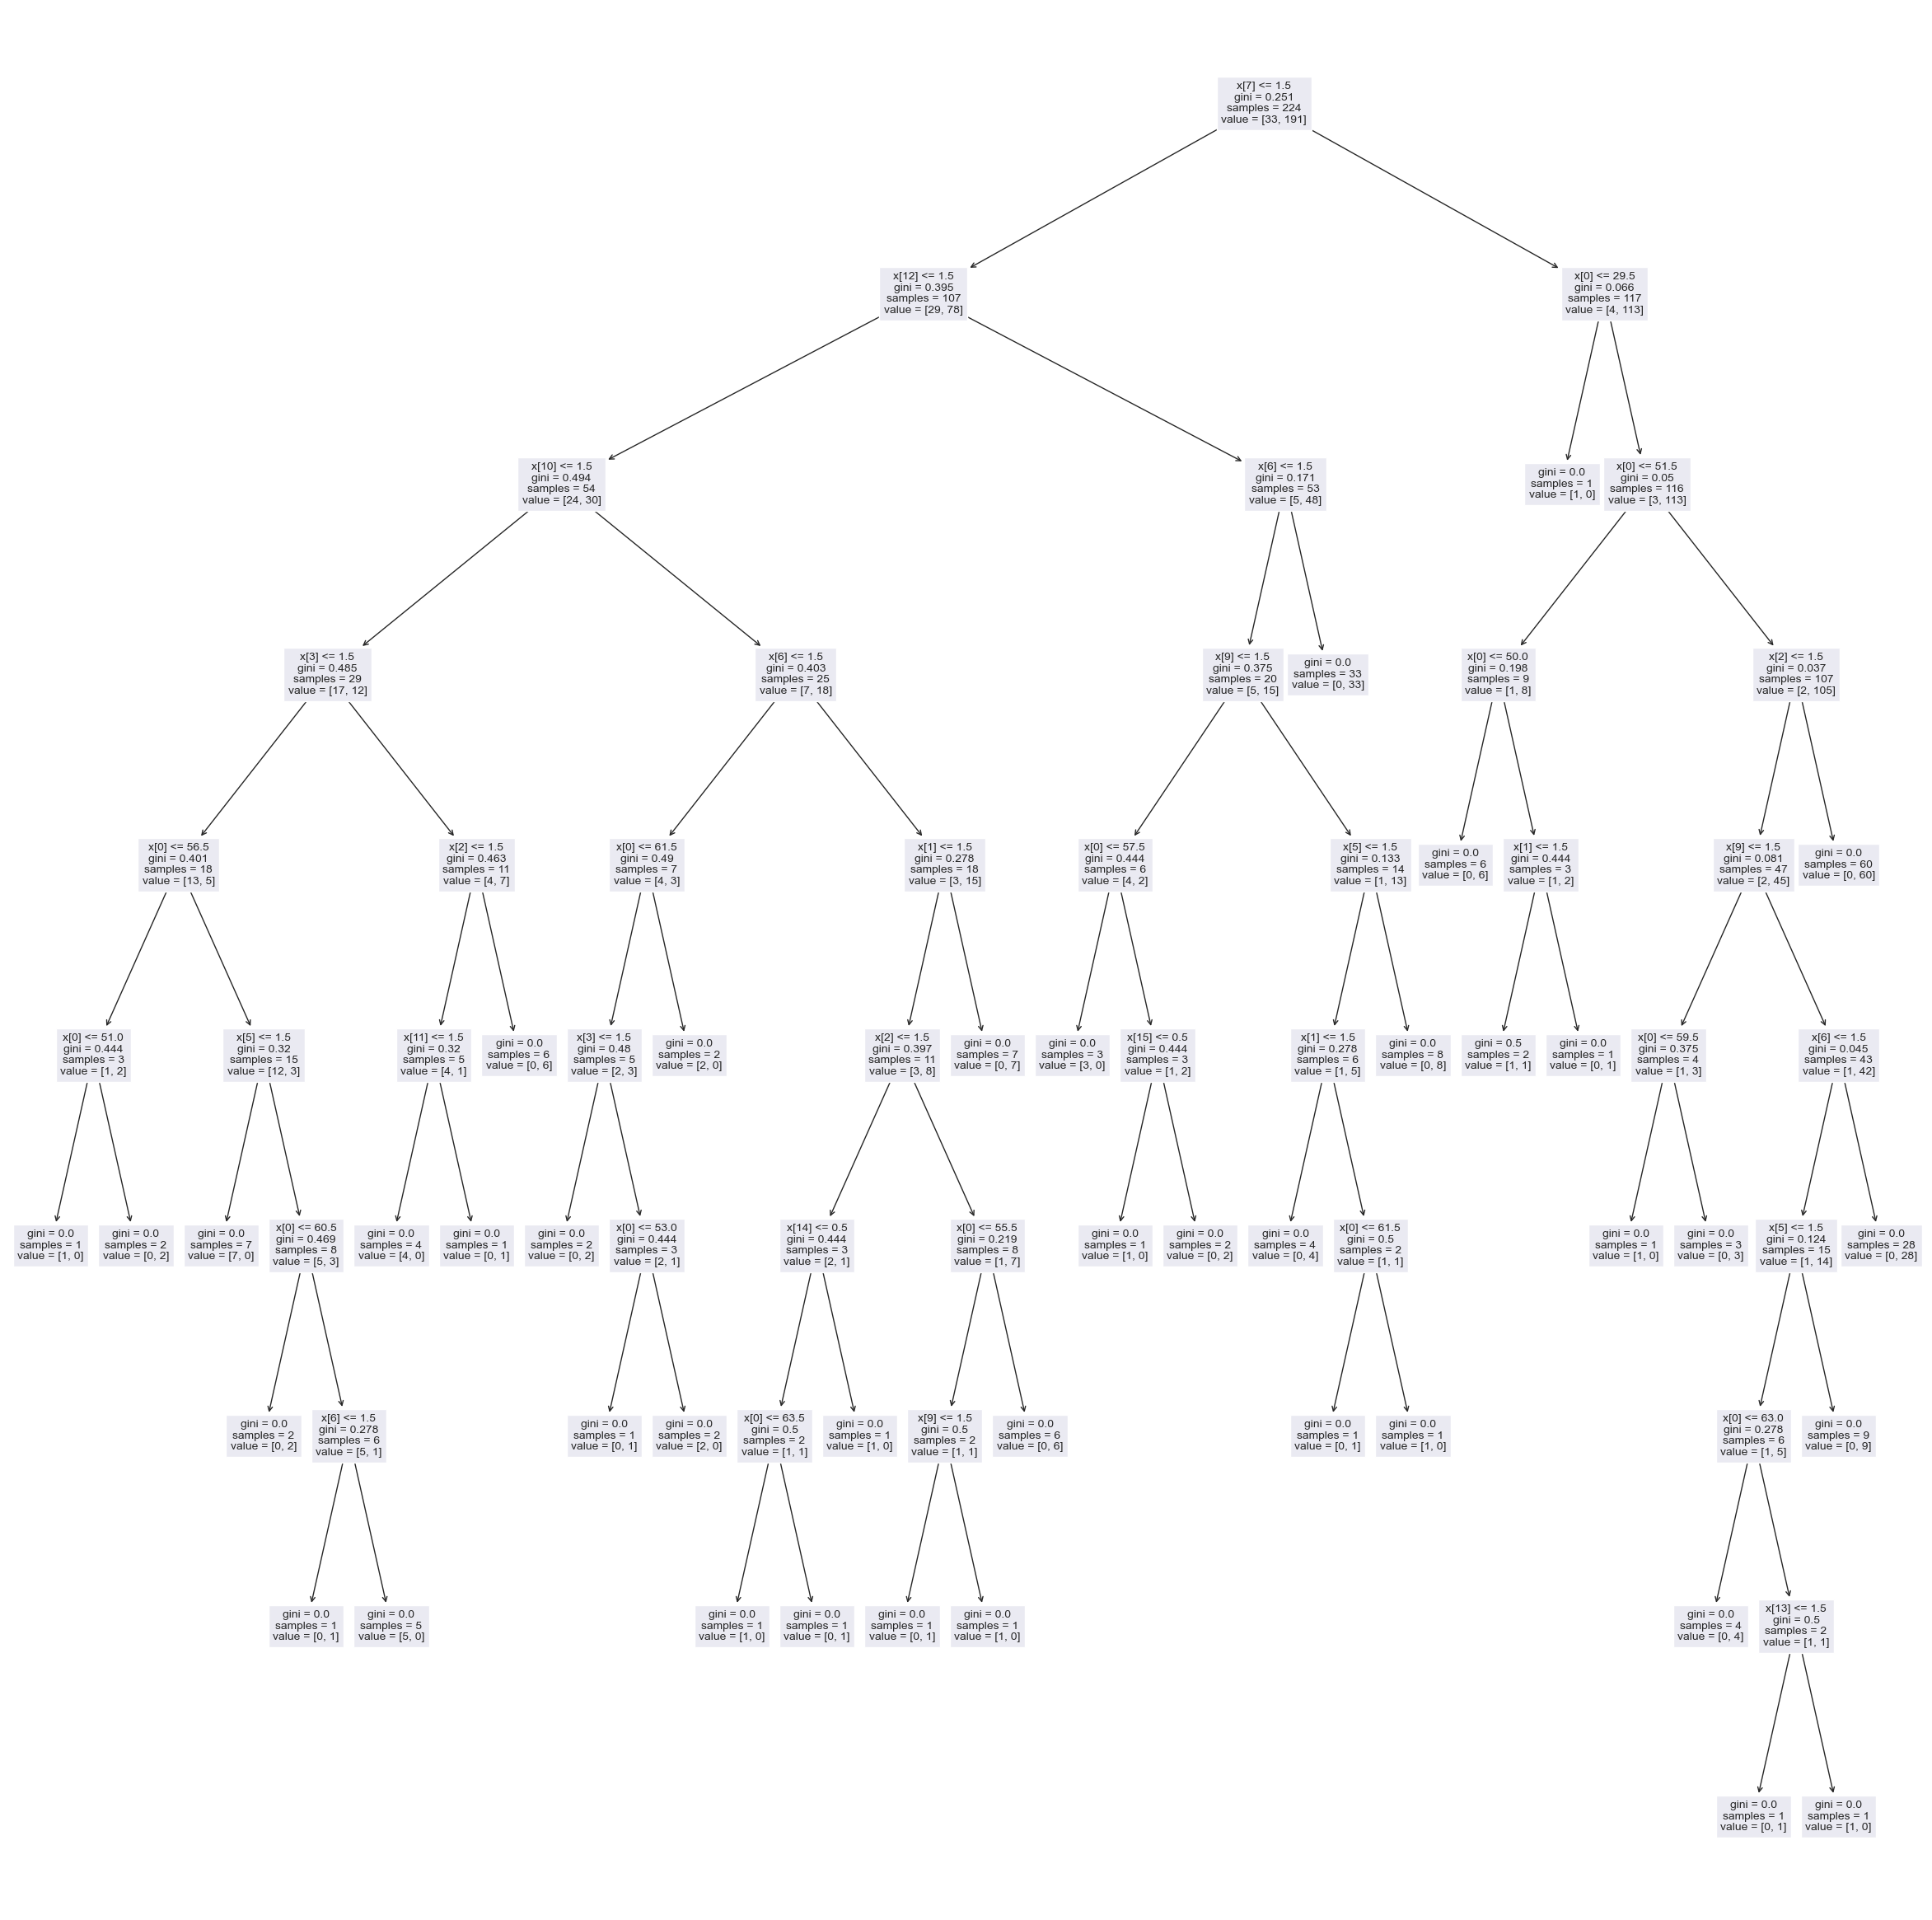

In [114]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(decision_tree,fontsize=10)
plt.show()

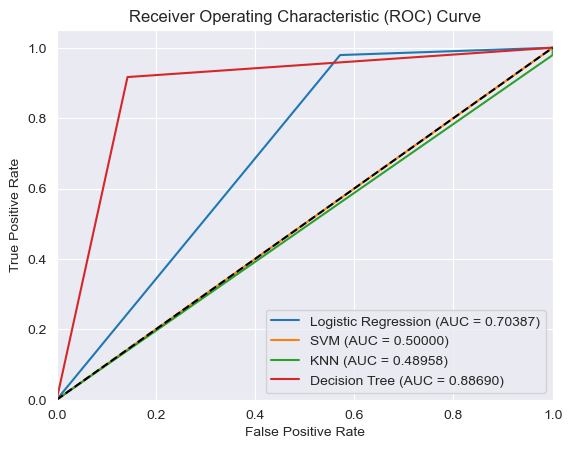

In [115]:
y_true_lr = y_test
y_scores_lr = logistic_regression_pred

y_true_svm = y_test
y_scores_svm = svm_pred

y_true_knn = y_test
y_scores_knn = knn_pred

y_true_dt = y_test
y_scores_dt = decision_tree_pred

fpr_lr, tpr_lr, _ = roc_curve(y_true_lr, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_true_svm, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_knn, tpr_knn, _ = roc_curve(y_true_knn, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_true_dt, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.5f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.5f)' % roc_auc_svm)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.5f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.5f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

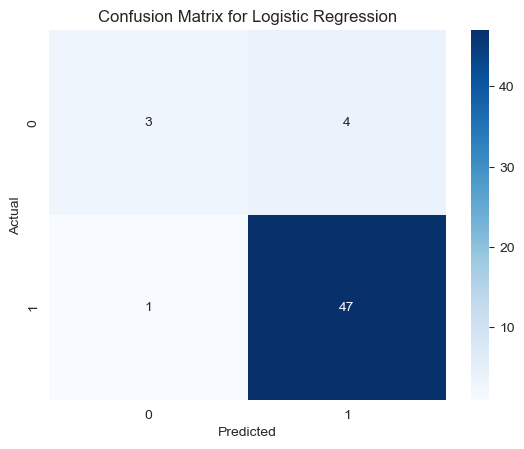

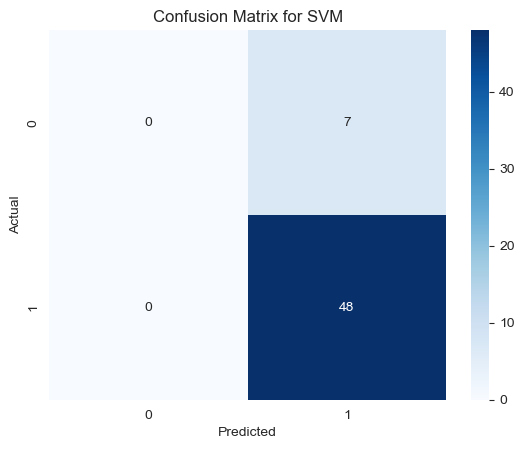

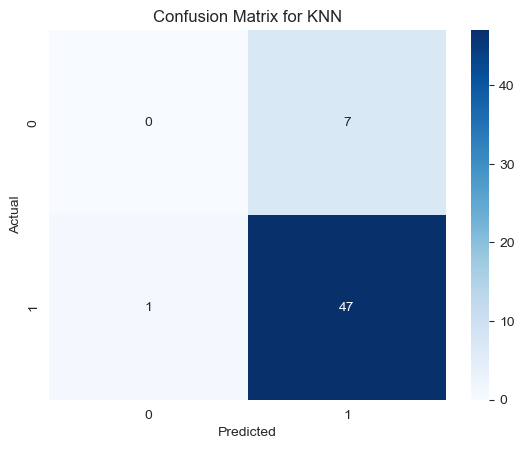

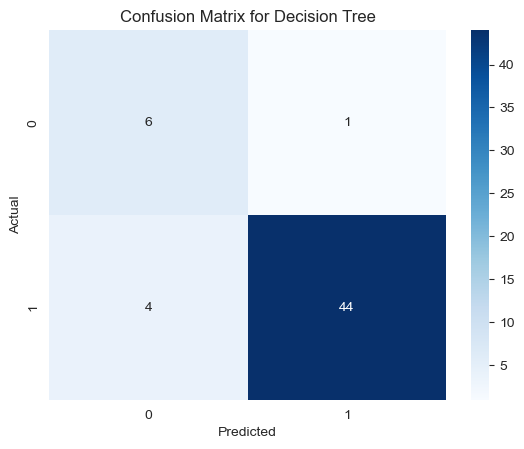

In [116]:
algorithms = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
y_pred = {
    'Logistic Regression': logistic_regression_pred,
    'SVM': svm_pred,
    'KNN': knn_pred,
    'Decision Tree': decision_tree_pred
}

# Create confusion matrix for each algorithm
for algorithm in algorithms:
    cm = confusion_matrix(y_test, y_pred[algorithm])
    plt.figure()
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {algorithm}')
    plt.show()


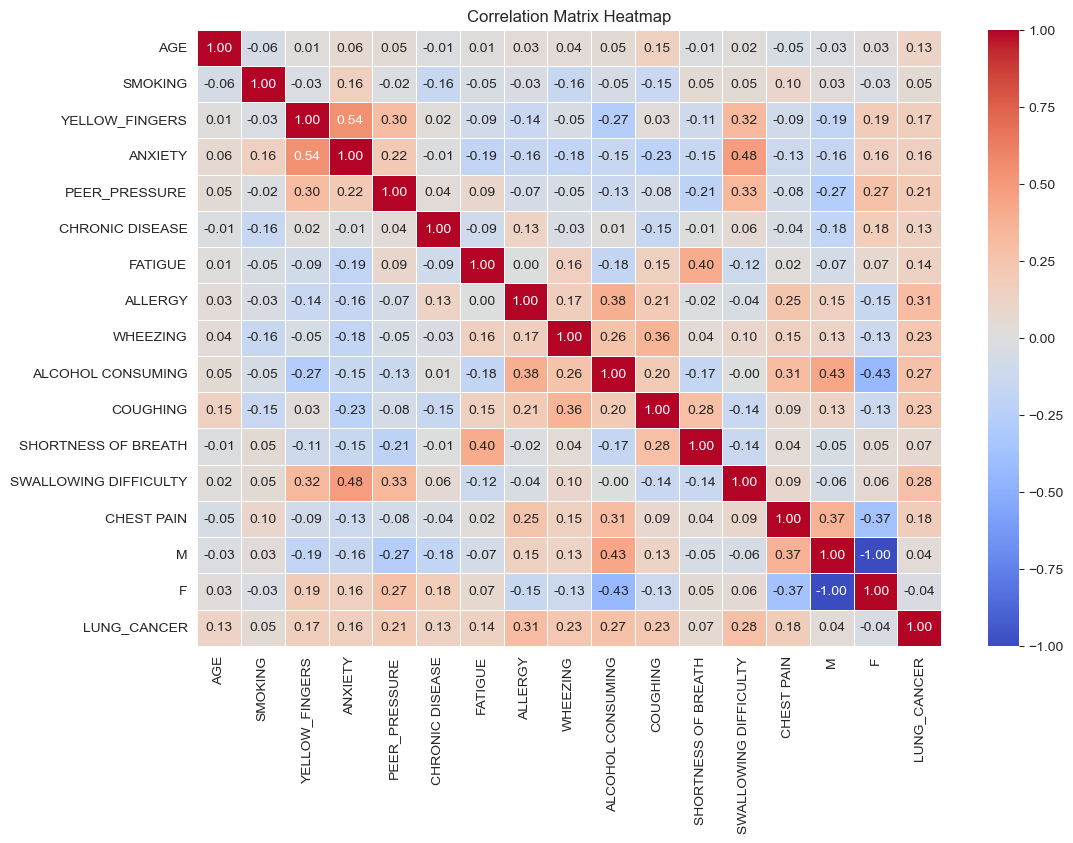

In [117]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [118]:
df = pd.read_csv("lung_cancer_s.csv")